In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
filename = 'result/ktp.csv'

# # Buat DataFrame kosong
# df = pd.DataFrame(columns=["file_name","model_version", "estimatedcost_$", "processing_time", "input_tokens", "output_tokens", "total_tokens"],)

# # Simpan DataFrame kosong ke file CSV
# df.to_csv(filename, index=False)

In [3]:
x = pd.read_csv(filename)
x = x.sort_values(by='estimatedcost_$',ascending=False).drop_duplicates(subset=['file_name','model_version'], keep='first')

In [4]:
x

,file_name,model_version,estimatedcost_$,processing_time,input_tokens,output_tokens,total_tokens
3,ktp2.png,gpt-4o-2024-08-06,0.005237,0 days 00:00:08.830310,1155,235,1390
0,ktp.png,gpt-4o-2024-08-06,0.005168,0 days 00:00:08.020616,1155,228,1383
1,ktp_test.png,gpt-4o-2024-08-06,0.005050,0 days 00:00:12.485188,1124,224,1348
7,ktp6.png,gpt-4o-2024-08-06,0.004435,0 days 00:00:11.998882,874,225,1099
2,ktp1.png,gpt-4o-2024-08-06,0.003780,0 days 00:00:05.938892,596,229,825
6,ktp5.png,gpt-4o-2024-08-06,0.003760,0 days 00:00:07.326915,596,227,823
4,ktp3.png,gpt-4o-2024-08-06,0.003312,0 days 00:00:05.634189,457,217,674
5,ktp4.png,gpt-4o-2024-08-06,0.003312,0 days 00:00:08.184653,457,217,674
12,ktp2.png,gpt-4o-mini-2024-07-18,0.000315,0 days 00:00:12.457837,1155,237,1392
15,ktp.png,gpt-4o-mini-2024-07-18,0.000308,0 days 00:00:14.567692,1155,224,1379


In [5]:
x.groupby('model_version').agg({
    'estimatedcost_$': ['sum', 'mean', 'median'],
    'input_tokens': ['sum', 'mean', 'median'],
    'output_tokens': ['sum', 'mean', 'median'],
    'total_tokens': ['sum', 'mean', 'median']
}).reset_index()

model_version estimatedcost_$                     input_tokens  \
                                      sum      mean    median          sum   
0       gpt-4o-2024-08-06        0.034055  0.004257  0.004108         6414   
1  gpt-4o-mini-2024-07-18        0.002052  0.000256  0.000250         6414   

                 output_tokens                total_tokens                  
     mean median           sum    mean median          sum     mean median  
0  801.75  735.0          1802  225.25  226.0         8216  1027.00  962.0  
1  801.75  735.0          1816  227.00  225.0         8230  1028.75  968.5

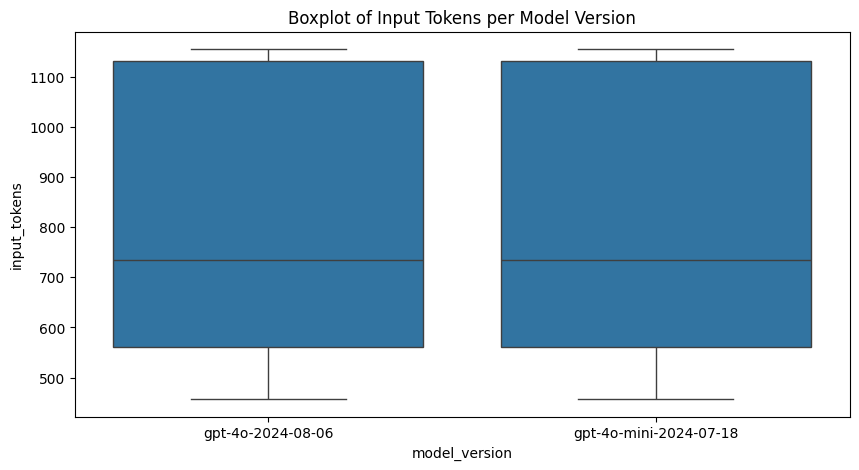

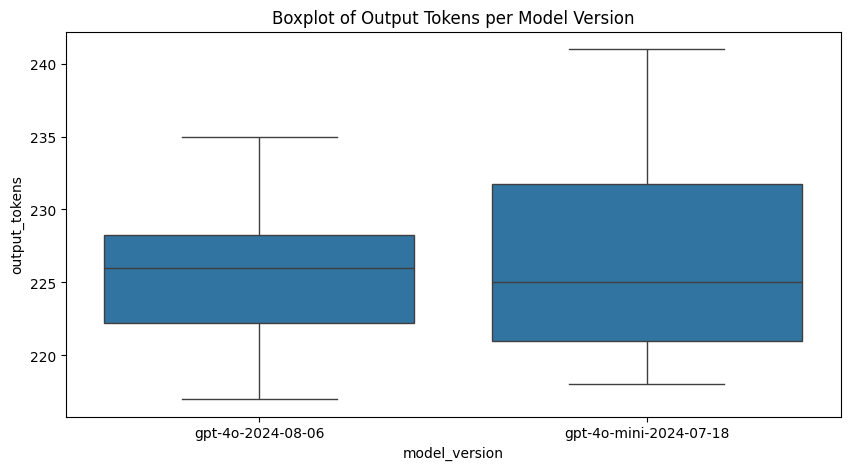

In [6]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='model_version', y='input_tokens', data=x)
plt.title('Boxplot of Input Tokens per Model Version')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='model_version', y='output_tokens', data=x)
plt.title('Boxplot of Output Tokens per Model Version')
plt.show()

In [10]:
for model in x.model_version.unique():
    print(f"Model: {model}")
    print(x[x.model_version == model].describe())
    print()

Model: gpt-4o-2024-08-06
       estimatedcost_$  input_tokens  output_tokens  total_tokens
count         8.000000      8.000000       8.000000       8.00000
mean          0.004257    801.750000     225.250000    1027.00000
std           0.000820    311.908297       6.065123     315.85892
min           0.003312    457.000000     217.000000     674.00000
25%           0.003648    561.250000     222.250000     785.75000
50%           0.004108    735.000000     226.000000     962.00000
75%           0.005079   1131.750000     228.250000    1356.75000
max           0.005237   1155.000000     235.000000    1390.00000

Model: gpt-4o-mini-2024-07-18
       estimatedcost_$  input_tokens  output_tokens  total_tokens
count         8.000000      8.000000       8.000000      8.000000
mean          0.000256    801.750000     227.000000   1028.750000
std           0.000048    311.908297       8.468429    313.620221
min           0.000199    457.000000     218.000000    675.000000
25%           0.0002